# Regresión Lineal - Vehicle dataset

##    Juan David Mora Daza

### 1. Instalación de Librerías

In [7]:
pip install numpy pandas scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


### 2. Importación de Librerías y Carga de Datos

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('car data.csv')  # Cambia el nombre según el archivo que uses


### 3. Exploración de Datos

In [10]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.644115   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000

### 4. Análisis Visual

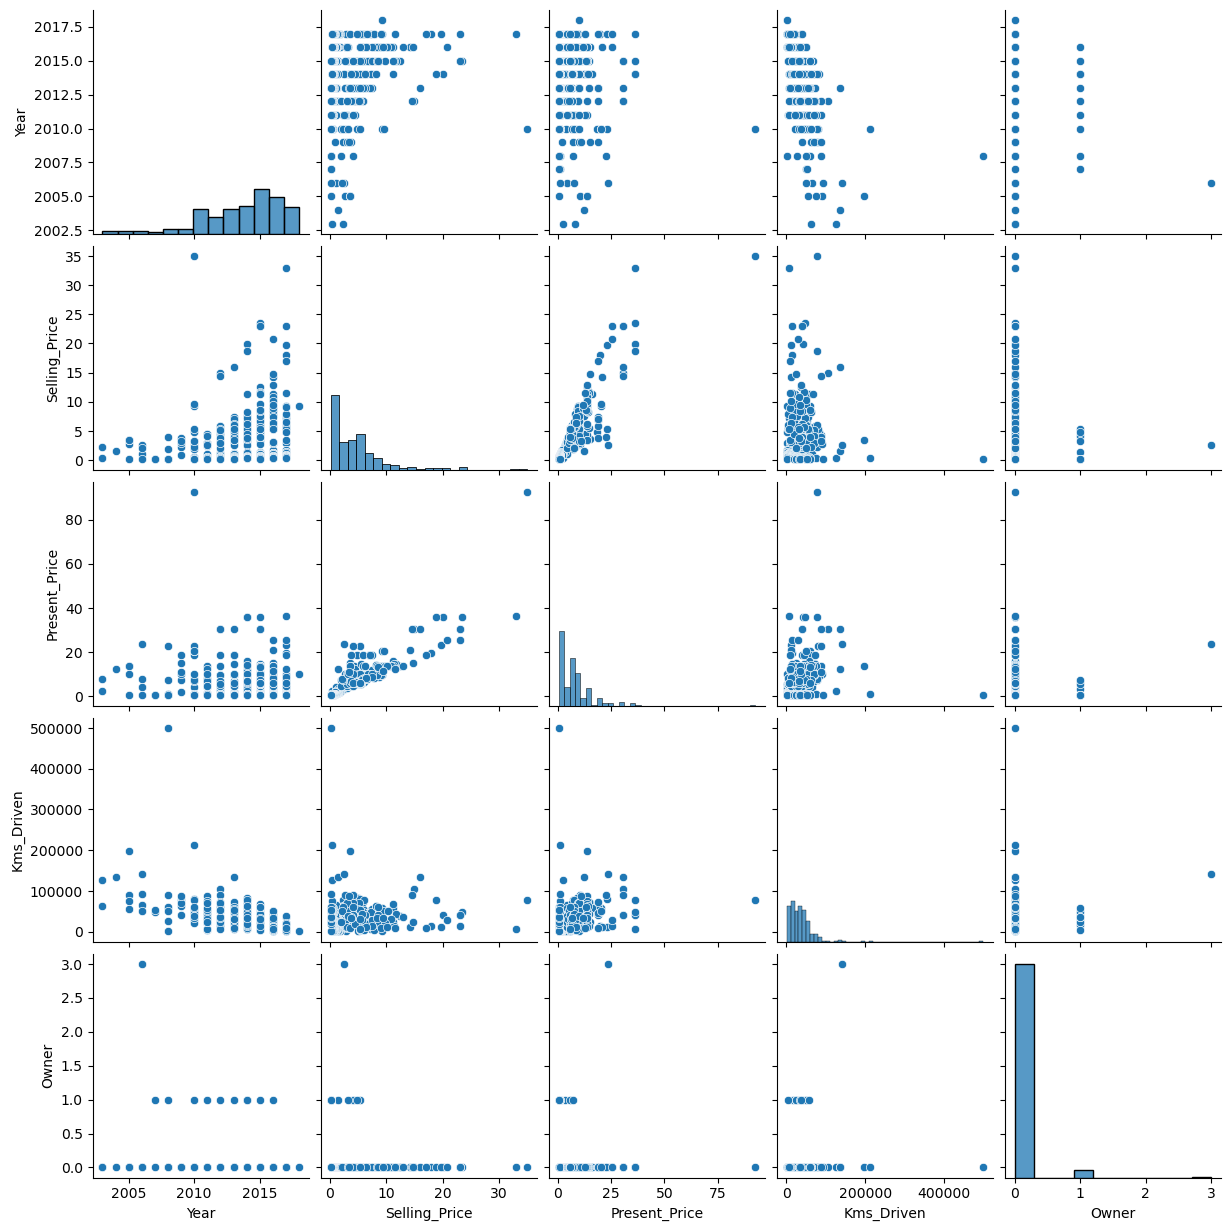

In [11]:
sns.pairplot(df)
plt.show()


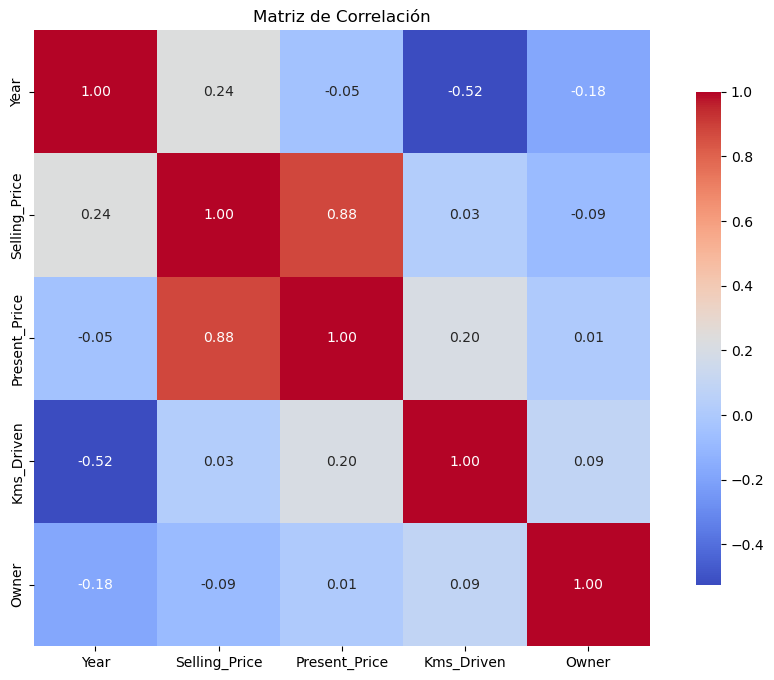

In [12]:
# Filtrar solo las columnas numéricas
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numerical_cols].corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title('Matriz de Correlación')
plt.show()


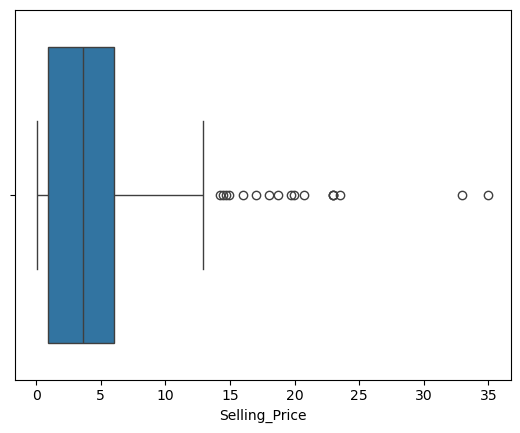

In [13]:
sns.boxplot(x=df['Selling_Price'])
plt.show()


### 5. Preprocesamiento de Datos

In [15]:

# Identificar valores faltantes
print(df.isnull().sum())  # Muestra el conteo de valores faltantes por columna

# Tratar valores faltantes utilizando 'ffill' o 'bfill'
df.ffill(inplace=True)  # Rellenar hacia adelante
# o
# df.bfill(inplace=True)  # Rellenar hacia atrás, si es más apropiado


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64


In [20]:
# Convertir variables categóricas a numéricas
df = pd.get_dummies(df, columns=['Fuel_Type', 'Seller_Type', 'Transmission'], drop_first=True)


In [21]:
# Eliminar columnas no relevantes solo si existen
df.drop(columns=['Car_Name', 'name'], inplace=True, errors='ignore')


In [22]:
# Imprimir las columnas del DataFrame
print(df.columns)


Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual'],
      dtype='object')


### 6. Entrenamiento del Modelo

In [30]:
from sklearn.ensemble import RandomForestRegressor

# Separar las características (X) y la variable objetivo (y)
X = df.drop('Selling_Price', axis=1)  # Asegúrate de que 'Selling_Price' es el nombre correcto
y = df['Selling_Price']

# Entrenar el modelo
model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# Obtener la importancia de las características
importance = model.feature_importances_


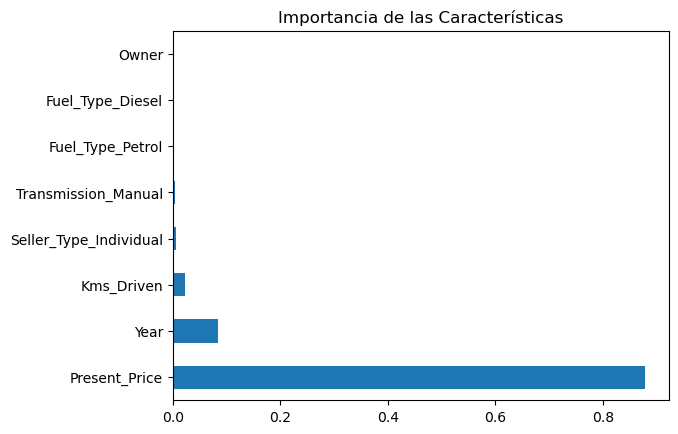

In [61]:
# Visualizar la importancia de las características
feature_importances = pd.Series(importance, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Importancia de las Características')
plt.show()


### 7. Evaluación del Modelo con Regresión Lineal

In [34]:
from sklearn.model_selection import train_test_split

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
from sklearn.linear_model import LinearRegression

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [38]:
from sklearn.metrics import mean_squared_error, r2_score

# Hacer predicciones
y_pred = model.predict(X_test)

# Calcular métricas de desempeño
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse}, R²: {r2}')
print(f'R² (Coeficiente de determinación): {r2}')
print(f'Error Absoluto Medio (MSE): {mse}')

MSE: 3.4788039706375318, R²: 0.8489813024899227
R² (Coeficiente de determinación): 0.8489813024899227
Error Absoluto Medio (MSE): 3.4788039706375318


### 8. Interpretación y Documentación de Resultados


- Coeficiente de Determinación (R²): El valor d R^2 = 0.849=0.849 indica que el modelo puede explicar aproximadamente el 84.9% de la variabilidad en los precios de venta de los vehículos. Esto es un buen indicador de que el modelo de regresión lineal es adecuado para predecir los precios, dado que el coeficiente de determinación está relativamente cerca de 1. Sin embargo, queda un 15.1% de la variabilidad en los precios que no se explica con las características seleccionadas. Esta porción de variabilidad no explicada podría deberse a factores no considerados en el modelo, como condiciones específicas del vehículo, demanda del mercado, u otros atributos subjetivos.
- 
Error Cuadrático Medio (MSE): El MSE de 3.479 sugiere que, en promedio, las predicciones del modelo están a aprox r3.479 ≈ 1.1.86 unidades de distancia de los valores reales de los precios en la misma escala. Dado que el MSE se expresa en unidades al cuadrado, al tomar la raíz cuadrada, el error promedio en términos de precios se entiende mejor y puede considerarse moderadamente bajo en el contexto de los datos. No obstante, dependiendo de la escala de los precios en el conjunto de datos, este valor puede ser alto o bajo, y podría ser útil reducirlo aún más si se requiere precisión alta.

### 9. Visualización de Resultados

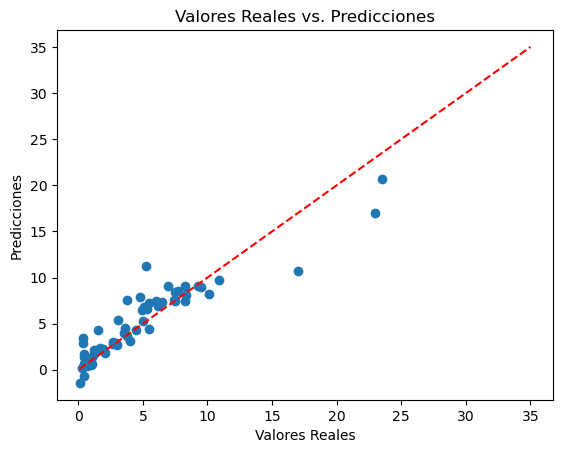

In [40]:
# Gráfico de dispersión
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs. Predicciones')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')  # Línea de referencia
plt.show()


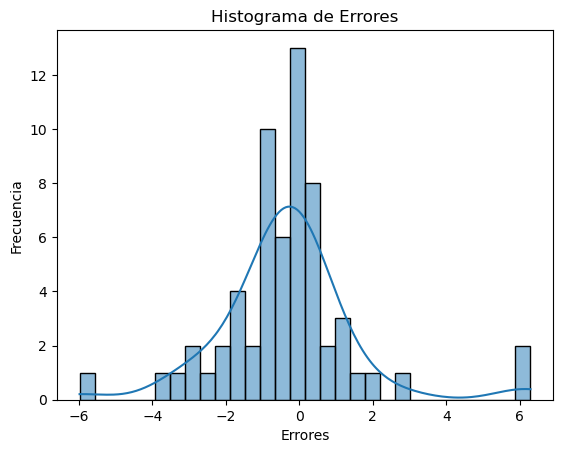

In [42]:
# Histograma de errores
sns.histplot(y_test - y_pred, bins=30, kde=True)
plt.title('Histograma de Errores')
plt.xlabel('Errores')
plt.ylabel('Frecuencia')
plt.show()
